In [0]:
from keras.datasets import mnist
#loading the mnist dataset

(train_data, train_target),(test_data, test_target) = mnist.load_data()
#spliting the dataset into training and testing

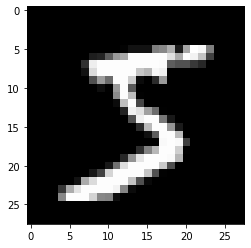

In [9]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [10]:
print(train_target[0])

5


In [0]:
train_data= train_data / 255.0 
test_data=test_data/255.0
#Scaling the 0-255 gray image to 0-1 (Requirement before training the Neural Network)

In [12]:
from keras.models import Sequential
#loading Sequential model from keras
from keras.layers import Flatten,Dense
#loading Flatten and Dense layers from keras

model = models.Sequential()
#creating a Sequential type neural network (a empty neural network, add layer by layer)
model.add(Flatten(input_shape=(28, 28)))
#a flatten layer to flatten up the 28x28 input image into 784 inputs
model.add(Dense(512, activation='relu'))
#1st Hidden layer with 512 Neurons
model.add(Dense(256, activation='relu'))
#2nd Hidden layer with 256 Neurons
model.add(Dense(10, activation='softmax'))
#output layer with 10 output neurons
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#compiling the neural network with necessary parameters

model.summary()
#neural network architecture and parameters

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.utils import to_categorical

train_target=to_categorical(train_target)
#convering the labels into a categorical representation

history=model.fit(train_data, train_target, epochs=50)
#training the neural network for 50 epochs

Epoch 1/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1830 - acc: 0.9450
Epoch 2/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.0779 - acc: 0.9760
Epoch 3/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0551 - acc: 0.9822
Epoch 4/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.0401 - acc: 0.9870
Epoch 5/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.0327 - acc: 0.9894
Epoch 6/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.0272 - acc: 0.9912
Epoch 7/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.0230 - acc: 0.9930
Epoch 8/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.0190 - acc: 0.9939
Epoch 9/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.0196 - acc: 0.9935
Epoch 10/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.0178 - a

In [14]:
results=model.predict(test_data)
print(results[:10])
#testing and getting results using unseen data

[[0.0000000e+00 6.9398118e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 2.4029764e-24 0.0000000e+00 3.4336058e-32
  0.0000000e+00 1.4799719e-26 2.6412619e-29 3.6321718e-27 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 6.5888029e-31 0.0000000e+00 8.2718347e-33
  2.4994573e-36 1.3434713e-24 0.0000000e+00 0.0000000e+00 5.3404138e-25]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 2.7210006e-37 0.0000000e+00 1.8196173e-28]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 2.4600285e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3877031e-34 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.4165492e-29 

In [0]:
import numpy as np
results=np.argmax(results,axis=1)

In [16]:
print(test_target[:10])
print(results[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,results)
print('Accuracy:',accuracy)
#getting the accuracy between the actual and predicted results

Accuracy: 0.9838


Text(0, 0.5, 'loss')

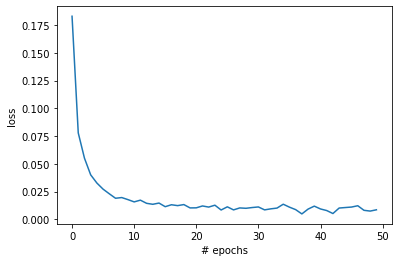

In [18]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
#visualizing the loss

Text(0, 0.5, 'accuracy')

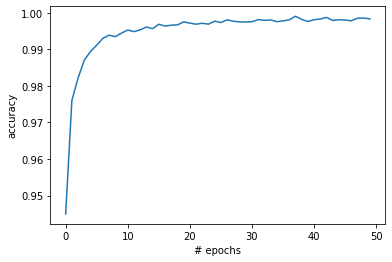

In [19]:
plt.plot(history.history['acc'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
#visualizing the accuracy